# Wikimedia database Topics Modeling

In [2]:
# check version
from pycaret.utils import version
version()

'3.0.0.rc3'

# 1. Loading Dataset

In [1]:
# load dataset
import pandas as pd

#https://docs.google.com/spreadsheets/d/1LJdsqxmhnTbGe2djTz1EbuJ85TVx3gQ6jj0Qlj1pZ9k/edit#gid=509961721
URL = 'https://drive.google.com/file/d/1U-MCsVWArIeQYPQ8xvZ2_82ePOhbZ8wJ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+ URL.split('/')[-2]

data = pd.read_csv(path) #, dtype="string"
data.drop("QID", axis=1, inplace=True)
data.rename(columns={"LEN": "Title"}, inplace=True) # rename column Title of Project or activity
data.head()

,Title,Description or Summary,Start date,End date,Institutions/Partners,Affiliate/Organization,Region,Country,Main focal point,Main Activities,...,Funding,Evaluation,Case Study,Newsletter articles,Other documentation,Media,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies
0,WikiAcademy Albania,Albanian speaking Wikimedians started organizi...,2013,NaN,NaN,Wikimedians of Albanian language UG,Eastern Europe,Albania,Greta Doçi,Editing training,...,Grants,No,No,No,NaN,https://meta.wikimedia.org/wiki/Grants:IEG/Wik...,NaN,NaN,NaN,NaN
1,Wikipedia Education Project Algeria,Familiarizing students with Wikipedia and expl...,2012,2018,University of Medea,Algeria Wikimedians UG,Northern Africa,Algeria,Fareh Abdelhak,Editing training,...,NaN,No,No,No,NaN,https://commons.wikimedia.org/wiki/Category:Wi...,NaN,NaN,NaN,NaN
2,Wikipedia en tu universidad,3 training sessions (3 days of work) for unive...,2015,"We organized it on demand, we launch at the be...",Various public and private universities in the...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,http://wikimedia.org.ar/programadeeducacion/ot...,NaN,NaN,NaN,NaN
3,"Online course: “Bridges for a free, digital, s...","Two online training courses for educators, of ...",2015,NaN,we partner specifically for the communication ...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,http://wikimedia.org.ar/programadeeducacion/ot...,NaN,NaN,NaN,NaN
4,Editing Clubs with high school students,Training sessions for educators that provide t...,2017,we define with each institution and partner th...,Partnerships with local instances of the Minis...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,NaN,NaN,"http://wikimedia.org.ar/clubesdeedicion/, http...",NaN,NaN,NaN,NaN


In [3]:
DataPoints = int((data.shape[0]) * 0.7)
trainDataset_1 = data[:DataPoints]
testDataset_1 = data[DataPoints:]
trainDataset_1.to_csv('trainDataset.csv', index=False)
testDataset_1.to_csv("testDataset.csv", index=False)

In [3]:
# https://docs.google.com/spreadsheets/d/1LJdsqxmhnTbGe2djTz1EbuJ85TVx3gQ6jj0Qlj1pZ9k/edit#gid=509961721
import pandas as pd

URL = 'https://drive.google.com/file/d/1U-MCsVWArIeQYPQ8xvZ2_82ePOhbZ8wJ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+ URL.split('/')[-2]

data = pd.read_csv(path) #, dtype="string"
data.drop("QID", axis=1, inplace=True)
data.rename(columns={"LEN": "Title"}, inplace=True) # rename column Title of Project or activity
data.head()

,Title,Description or Summary,Start date,End date,Institutions/Partners,Affiliate/Organization,Region,Country,Main focal point,Main Activities,...,Funding,Evaluation,Case Study,Newsletter articles,Other documentation,Media,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies
0,WikiAcademy Albania,Albanian speaking Wikimedians started organizi...,2013,NaN,NaN,Wikimedians of Albanian language UG,Eastern Europe,Albania,Greta Doçi,Editing training,...,Grants,No,No,No,NaN,https://meta.wikimedia.org/wiki/Grants:IEG/Wik...,NaN,NaN,NaN,NaN
1,Wikipedia Education Project Algeria,Familiarizing students with Wikipedia and expl...,2012,2018,University of Medea,Algeria Wikimedians UG,Northern Africa,Algeria,Fareh Abdelhak,Editing training,...,NaN,No,No,No,NaN,https://commons.wikimedia.org/wiki/Category:Wi...,NaN,NaN,NaN,NaN
2,Wikipedia en tu universidad,3 training sessions (3 days of work) for unive...,2015,"We organized it on demand, we launch at the be...",Various public and private universities in the...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,http://wikimedia.org.ar/programadeeducacion/ot...,NaN,NaN,NaN,NaN
3,"Online course: “Bridges for a free, digital, s...","Two online training courses for educators, of ...",2015,NaN,we partner specifically for the communication ...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,http://wikimedia.org.ar/programadeeducacion/ot...,NaN,NaN,NaN,NaN
4,Editing Clubs with high school students,Training sessions for educators that provide t...,2017,we define with each institution and partner th...,Partnerships with local instances of the Minis...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,WMF APG,NaN,No,NaN,NaN,"http://wikimedia.org.ar/clubesdeedicion/, http...",NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          197 non-null    object 
 1   Description or Summary         187 non-null    object 
 2   Start date                     185 non-null    object 
 3   End date                       121 non-null    object 
 4   Institutions/Partners          170 non-null    object 
 5   Affiliate/Organization         177 non-null    object 
 6   Region                         196 non-null    object 
 7   Country                        196 non-null    object 
 8   Main focal point               186 non-null    object 
 9   Main Activities                187 non-null    object 
 10  Wikimedia Projects Used        192 non-null    object 
 11  Audience                       137 non-null    object 
 12  Level of Education             189 non-null    obj

In [5]:
# suggesting classes/Individuals
data.columns

Index(['Title', 'Description or Summary', 'Start date', 'End date',
       'Institutions/Partners', 'Affiliate/Organization', 'Region', 'Country',
       'Main focal point', 'Main Activities', 'Wikimedia Projects Used',
       'Audience', 'Level of Education', 'SDG4 Areas', 'Subject',
       'Skills addressed', 'Funding', 'Evaluation', 'Case Study',
       'Newsletter articles', 'Other documentation', 'Media',
       'Number of pages created', 'Number of bytes added',
       'Number of participants', 'Number of Influenced Policies'],
      dtype='object')

In [6]:
data['Subject'].value_counts()

Language                                                          8
History                                                           8
Math, Science, Literature, Art, Photography, History, Language    7
Science                                                           6
-                                                                 5
                                                                 ..
Biology, Forensic Chemistry                                       1
Computer Science and Language                                     1
Digitisation, Skill learning                                      1
School Wiki                                                       1
Information management                                            1
Name: Subject, Length: 84, dtype: int64

In [7]:
data[data['Affiliate/Organization'] == 'Wikimedia CH'].groupby('Affiliate/Organization').count()

,Title,Description or Summary,Start date,End date,Institutions/Partners,Region,Country,Main focal point,Main Activities,Wikimedia Projects Used,...,Funding,Evaluation,Case Study,Newsletter articles,Other documentation,Media,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies
Affiliate/Organization,,,,,,,,,,,,,,,,,,,,,
Wikimedia CH,2,0,2,0,2,2,2,0,2,2,...,2,0,0,0,0,0,0,0,0,0


In [8]:
data[data['Affiliate/Organization'] == 'Wikimedia CH']
# data[data['Country'] == 'Switzerland']

,Title,Description or Summary,Start date,End date,Institutions/Partners,Affiliate/Organization,Region,Country,Main focal point,Main Activities,...,Funding,Evaluation,Case Study,Newsletter articles,Other documentation,Media,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies
78,University of Berne,NaN,2018,NaN,University of Berne,Wikimedia CH,Central Europe,Switzerland,NaN,"Training, awareness",...,WMF APG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,University of Neuchâtel,NaN,2018,NaN,University of Neuchâtel,Wikimedia CH,Central Europe,Switzerland,NaN,"Trainining, awareness",...,WMF APG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data['Wikimedia Projects Used'].value_counts()

Wikipedia                                                                       116
Wikipedia, Commons                                                               14
Wikipedia, Wikimedia Commons                                                      7
Wikipedia, Wikimedia Commons, Wikidata                                            4
Wikipedia, Commons, Wikisource                                                    3
Wiktionary                                                                        2
Wikimedia Commons, Wikipedia                                                      2
Vicipéid, Wikipedia, and Wikimedia Commons                                        2
Wikipedia and Wikimedia Commons                                                   2
Wikimedia Commons                                                                 2
Wikipedia, Wikisource, Incubator                                                  2
Wikicommons                                                                 

In [10]:
contain_values = data[data['Wikimedia Projects Used'].str.contains('Wikimedia', na=False)]

In [11]:
contain_values

,Title,Description or Summary,Start date,End date,Institutions/Partners,Affiliate/Organization,Region,Country,Main focal point,Main Activities,...,Funding,Evaluation,Case Study,Newsletter articles,Other documentation,Media,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies
15,Wikipedia Education Program Bulgaria,Introducing Wikipedia as a learning tool in un...,2009,2018,"Sofia University, New Bulgarian University, Un...",Wikimedians of Bulgaria,Eastern Europe,Bulgaria,"Spiritia, Maymay, Laveol",Research,...,NaN,No,No,NaN,https://outreach.wikimedia.org/wiki/Education/...,NaN,NaN,NaN,NaN,NaN
19,Photo project and outreach in China,Outreach activities and photo project on Wikim...,2015,2015,"Shanghai Jiaotong University, Dalian Universit...",Wikimedia UG China,East Asia,China,Addis Wang; Wilson ye,Photo expedition,...,NaN,No,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,NaN,NaN,NaN,NaN,NaN
26,Education program in universities - Estonia,"Promotion of Wikipedia in education, productio...",2007,NaN,"University of Tartu, Estonian Entrepreneurship...",Wikimedia Eesti,Eastern Europe,Estonia,Ivo Kruusamägi,Editing training,...,NaN,No,No,https://outreach.wikimedia.org/wiki/Education/...,https://outreach.wikimedia.org/wiki/Education/...,https://blog.wikimedia.org/2015/07/30/educatio...,NaN,NaN,NaN,NaN
30,Tartu Art School image project,Art students provide free images and pictures ...,2014,2014,University of Tartu,Wikimedia Eesti,Eastern Europe,Estonia,Kaarel Vaidla,Photo uploads,...,NaN,No,No,No,https://outreach.wikimedia.org/wiki/Education/...,NaN,NaN,NaN,NaN,NaN
31,Wikipedia editing for students in Finland,"It has 3 courses - computer science, design, a...",2014,2018,University of Helsinki Department of Computer ...,Wikimedia Suomi,Northern Europe,Finland,Teemu Perhiö,Editing training,...,University Helsinki and Alto,No,No,No,NaN,http://informaatiomuotoilu.fi/2012/03/student-...,NaN,NaN,NaN,NaN
36,Valoriser ses connaissances avec Wikipédia,The goal is to guide PhD students or young res...,2009,2018,Lille Nord University of France,Wikimedia France,Western Europe,France,Nathalie Martin,"research, student editing",...,NaN,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/Projet:Valoriser...,NaN,NaN,NaN,NaN,NaN
97,WikiChallenge Ecoles d'Afrique,Primary school students writing encyclopedic a...,9/1/2017,NaN,Orange Foundation,WikiAfrica,"Eastern Africa, Middle Africa, Western Africa,...","Tunisia, Madagascar, Cameroon, Niger, Guinea, ...",Florence Devouard,"Editor Training, Teacher Training, Photo exped...",...,Orange Foundation,no,https://commons.wikimedia.org/wiki/File:WikiCh...,Several in the Education newsletter,https://fr.vikidia.org/wiki/Projet:WikiChallen...,NaN,NaN,NaN,NaN,NaN
98,VVIT WikiConnect,VVIT WikiConnect is a student organization fro...,11/6/2017,NaN,Vasireddy Venkatadri Institute of Technology,NaN,Southern Asia,India,Krishna Chaitanya Velaga,"WikiClub, Editor Training, Teacher Training, T...",...,"Wikimedia Foundation, CIS-A2K",https://meta.wikimedia.org/wiki/Grants:Project...,NaN,https://outreach.wikimedia.org/wiki/Category:V...,NaN,NaN,NaN,NaN,NaN,NaN
100,Writing Cultural History on Wikipedia,12th grade (final year) students at Swedish hi...,9/1/2016,4/1/2019,6 Swedish high schools,Wikimedia Sverige,Northern Europe,Sweden,Aron Ambrosiani,"Editor Training, Teacher Training, Digitization",...,None,No structured evaluation,Has been presented in Swedish in http://libris...,NaN,some articles in Swedish can be found at https...,NaN,NaN,NaN,NaN,NaN
104,University of Edinburgh Wikimedian in Residence,The University of Edinburgh residency is to fa...,1/11/2016,NaN,University of Edinburgh,Wikimedia UK (and Wikimedia Scotland #ScotWiki),"Western Europe, Northern Europe",Scotland,Ewan McAndrew,"Editor Training, Teacher Training, Research, T...",...,University of Edinburgh,https://en.wikipedia.org/wiki/Wikipedia:Univer...,https://www.jisc.ac.uk/news/turning-students-f...,https://blog.w

<AxesSubplot: >

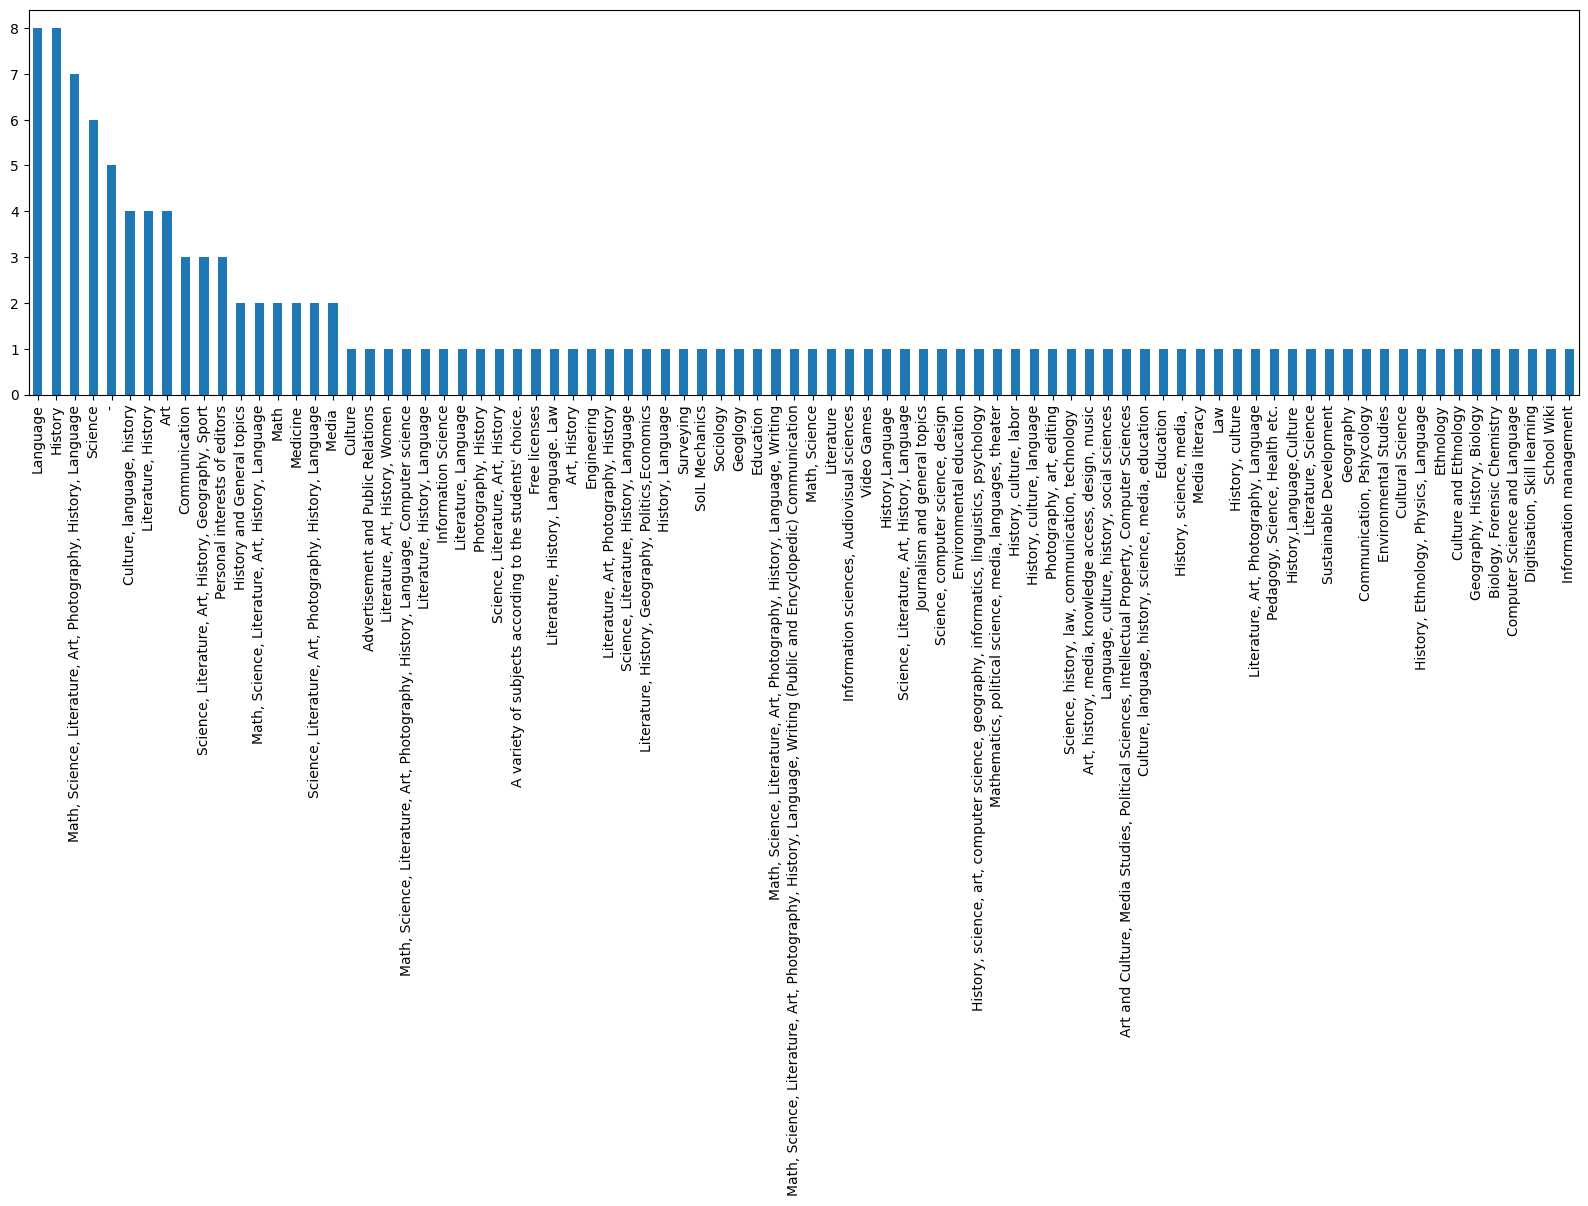

In [12]:
data['Subject'].value_counts().plot(kind='bar', figsize=(20, 5))

In [13]:
data.columns    

Index(['Title', 'Description or Summary', 'Start date', 'End date',
       'Institutions/Partners', 'Affiliate/Organization', 'Region', 'Country',
       'Main focal point', 'Main Activities', 'Wikimedia Projects Used',
       'Audience', 'Level of Education', 'SDG4 Areas', 'Subject',
       'Skills addressed', 'Funding', 'Evaluation', 'Case Study',
       'Newsletter articles', 'Other documentation', 'Media',
       'Number of pages created', 'Number of bytes added',
       'Number of participants', 'Number of Influenced Policies'],
      dtype='object')

# 2. Initialize Setup

In [14]:
from pycaret.nlp import *
nlp1 = setup(data, target = 'Description or Summary', session_id=123, log_experiment=True, log_plots = True, experiment_name='wikimedia_1')

Description,Value
session_id,123
Documents,197
Vocab Size,821
Custom Stopwords,False


# 3. Create Model

In [15]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [16]:
lda = create_model('lda')

In [57]:
nmf = create_model('nmf', num_topics = 10)

# 4. Assign Labels

In [17]:
lda_results = assign_model(lda)
lda_results.head()

,Title,Description or Summary,Start date,End date,Institutions/Partners,Affiliate/Organization,Region,Country,Main focal point,Main Activities,...,Number of pages created,Number of bytes added,Number of participants,Number of Influenced Policies,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,WikiAcademy Albania,speak wikimedian start organize workshop shqip...,2013,NaN,NaN,Wikimedians of Albanian language UG,Eastern Europe,Albania,Greta Doçi,Editing training,...,NaN,NaN,NaN,NaN,0.009877,0.971491,0.008747,0.009885,Topic 1,0.97
1,Wikipedia Education Project Algeria,familiarize student explore way use work student,2012,2018,University of Medea,Algeria Wikimedians UG,Northern Africa,Algeria,Fareh Abdelhak,Editing training,...,NaN,NaN,NaN,NaN,0.011220,0.015981,0.009936,0.962863,Topic 3,0.96
2,Wikipedia en tu universidad,training session day work university student p...,2015,"We organized it on demand, we launch at the be...",Various public and private universities in the...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,NaN,NaN,NaN,NaN,0.357021,0.131441,0.002127,0.509410,Topic 3,0.51
3,"Online course: “Bridges for a free, digital, s...",online training course educator week duration ...,2015,NaN,we partner specifically for the communication ...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,NaN,NaN,NaN,NaN,0.131880,0.004145,0.002577,0.861397,Topic 3,0.86
4,Editing Clubs with high school students,training session educator provide tool tackle ...,2017,we define with each institution and partner th...,Partnerships with local instances of the Minis...,Wikimedia Argentina,South America,Argentina,"Luisina Ferrante, Florencia Guastavino",Editing training,...,NaN,NaN,NaN,NaN,0.003131,0.004458,0.002773,0.989637,Topic 3,0.99


# 5. Analyze Model

In [18]:
plot_model(lda)

In [17]:
plot_model(lda, plot = 'bigram')

In [18]:
plot_model(lda, plot = 'topic_distribution')

In [65]:
plot_model(lda, plot = 'topic_distribution')

# 6. Evaluate  Model

In [19]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# 7. Tune Model

In [43]:
#%tb 
#model_lda_tune = tune_model(lda, supervised_target = 'Subject', multi_core=True) # error
#assign_model(model_lda_tune)
# evaluate_model(model_lda_tune)

# 8. Experiments Tracking with MLFlow

In [ ]:
!mlflow ui